### R-Square Demonstration for Trend Modeling 

Here's a simple workflow to demonstrate the common applications of R-square in trend modeling. We will talk about some of its limitations and misunderstanding, e.g. low R-squared values are not always bad and high R-squared values are not always good. 

R-Square is common techique used to measure the precision of model prediction, how cloase the data are to the fitted regression line. it is alos known as the coefficient of determination.
It is a standard built-in function in many software packages. Despite its popularity, R-Square suffers series downsides and is misused by practitioners. 

#### Definition of R-Square 

R-Square is the percentage of the response variable variation that is explained by a linear model,

                    R-Square = explained variation / total variation
                    
R-squared is always between 0 and 100%:

* 0% indicates that the model explains none of the variability of the response data around its mean.
* 100% indicates that the model explains all the variability of the response data around its mean.

#### Limitations of R-Square

1. R-Square cannot determine whether the coefficient estimates and the predictions are biased, which is why we must assess the residual plots.
2. R-Square does not indicate whether a regression model is adequate. One can have a low R-Square value for a good model, or a high R-Square value for a model that does not fit the data. Note: high R-Square does not guarantee that the model is a good fit.

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import seaborn as sns                     # model confidence intervals
import random                             #import random function from random module
import scipy.stats as st                  # statistical methods

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [3]:
os.chdir("C:/Users/yx2957/Documents/Research/Induced Seismicity/Python Codes")             # set the working directory

#### Read the data table
First copy the "sample_data_MV_biased.csv" comma delimited file from https://github.com/GeostatsGuy/GeoDataSets to your working directory, then run this command to read the file into a DataFrame object (part of Pandas package).
Let's make a couple simple datasets to explore different cases. 

In [3]:
df = pd.read_csv('sample_data_MV_biased.csv') # load our data table (wrong name!)
df.head(7)

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,0,100.0,900.0,0.0,0.101319,1.996868,5590.417154
1,1,100.0,800.0,1.0,0.147676,10.711789,3470.845666
2,2,100.0,700.0,1.0,0.145912,17.818143,3586.988513
3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787
4,4,100.0,500.0,1.0,0.146088,16.717367,2534.551236
5,9,200.0,900.0,1.0,0.129949,23.348473,4781.590782
6,11,200.0,700.0,1.0,0.185299,595.674540,4729.017454




Let's remove the well index and check the summary summary statistics.

In [4]:
df = df.iloc[:,1:8]            # copy all rows and columns 1 through 8, note 0 column is removed
df.describe().transpose()           # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
X,368.0,499.565217,289.770794,0.000000,240.000000,500.000000,762.500000,990.000000
Y,368.0,520.644022,277.412187,9.000000,269.000000,539.000000,769.000000,999.000000
Facies,368.0,0.597826,0.491004,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,368.0,0.127026,0.030642,0.041122,0.103412,0.125842,0.148623,0.210258
Perm,368.0,85.617362,228.362654,0.094627,2.297348,10.377292,50.581288,1991.097723
AI,368.0,4791.736646,974.560569,1981.177309,4110.728374,4713.325533,5464.043562,7561.250336


#### Compare the R-squared values of the same trend line given two datasets with different variances
we first plot porosity vs acoustic impedance from our original dataset with a 1st order polynomial linear fit  

In [5]:
x = np.linspace(0, 8000, 368)
results = {}

p1 = np.polyfit(df['AI'],df['Porosity'], deg=1, rcond=None, w=None, cov=False)
m1 = np.polyval(p1,x)

# Polynomial Coefficients
results['polynomial'] = p1.tolist()

# r-squared
p = np.poly1d(p1)
# fit values, and mean
yhat = p(df['AI'])                         # or [p(z) for z in x]
ybar = np.sum(df['Porosity'])/len(df['Porosity'])          # or sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((df['Porosity'] - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
results['determination'] = ssreg / sstot


print('the R-square value is:',results['determination'])

the R-square value is: 0.3291311903689643


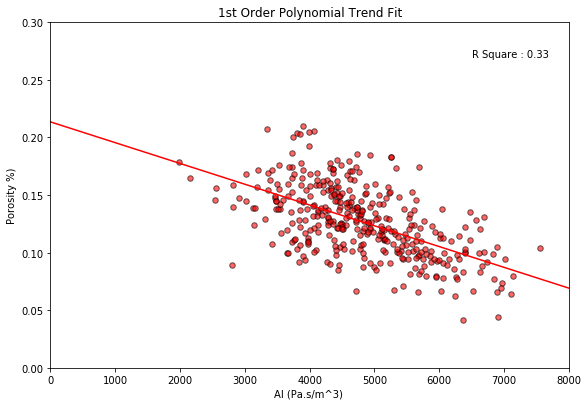

In [6]:
plt.subplot(111)
plt.scatter(df['AI'],df['Porosity'], s=30, alpha = 0.6, edgecolors = "black", facecolor = 'red')
plt.plot(x, m1, c='red')
plt.xlim([0,8000]); plt.ylim([0,.3])
plt.xlabel('AI (Pa.s/m^3) '); plt.ylabel('Porosity %)'); plt.title('1st Order Polynomial Trend Fit')
plt.text(6500, 0.27, 'R Square : %.2f' %(results['determination']))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [7]:
m1[1]

0.2130675881163392

Now lets generate a new set of permeability data from the same trend line obtained above but with a smaller variance. We do this by adding a gaussian noise to the trend line. 

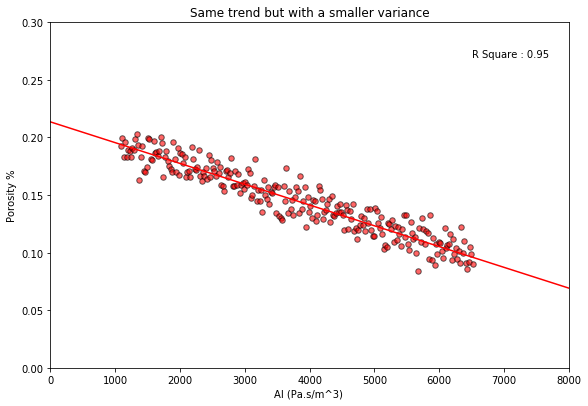

In [8]:
trend = x * p1[0] + p1[1]
noise = np.random.normal(0,.01,368)
mix = trend + noise

from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(mix, m1)

plt.subplot(111)
plt.scatter(x[50:300], mix[50:300], s=30, alpha = 0.6, edgecolors = "black", facecolor = 'red')
plt.plot(x, m1, c='red')
plt.xlim([0,8000]); plt.ylim([0,.3])
plt.xlabel('AI (Pa.s/m^3) '); plt.ylabel('Porosity %'); plt.title('Same trend but with a smaller variance')
plt.text(6500, 0.27, 'R Square : %.2f' %(coefficient_of_dermination))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Look at the residual plot!!! Be vary of overfitting!!!
In the section we tried to answer the irony of why a high R-square value is not always good and a low R-square value is not always bad. 

Our first assessment is to look at the residual plot which will render important insights


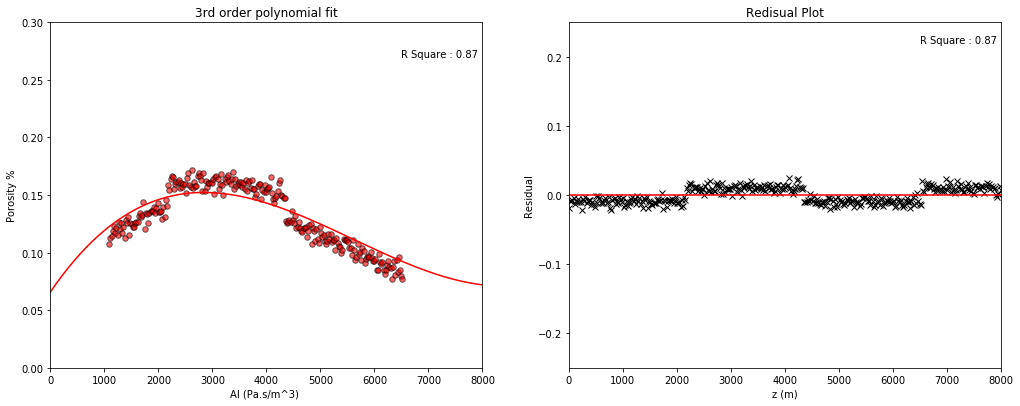

In [9]:
p3 = np.polyfit(df['AI'],df['Porosity'], deg=3, rcond=None, w=None, cov=False)
m3 = np.polyval(p3,x)

trend3 = x**3 * p3[0] + x**2*p3[1] + x*p3[2] + p3[3]
noise1 = np.random.normal(-0.01,.005,100)
noise2 = np.random.normal(0.01,.005,100)
noise3 = np.random.normal(-0.01,.005,100)
noise4 = np.random.normal(0.01,.005,68)
noise5 = np.concatenate((noise1, noise2, noise3, noise4), axis = None)
mix3 = trend3 + noise5

from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(mix3, m3)

plt.subplot(121)
plt.scatter(x[50:300], mix3[50:300], s=30, alpha = 0.6, edgecolors = "black", facecolor = 'red')
plt.plot(x, m3, c='red')
plt.xlim([0,8000]); plt.ylim([0,.3])
plt.xlabel('AI (Pa.s/m^3) '); plt.ylabel('Porosity %'); plt.title('3rd order polynomial fit')
plt.text(6500, 0.27, 'R Square : %.2f' %(coefficient_of_dermination))

plt.subplot(122)
r1 = (mix3 - m3)
plt.plot(x,r1, 'x', c='black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim([0,8000]); plt.ylim([-.25,.25])
plt.xlabel('z (m)'); plt.ylabel('Residual'); plt.title('Redisual Plot')
plt.text(6500, 0.22, 'R Square : %.2f' %(coefficient_of_dermination))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()



Notice how the trend line systematically over and under predicts the data which is evident in the residual plot. 
We want the residual plot to be white noise, that means the residuals should have a normal gaussian distribution!

* The residuals should not be correlated with another variable. If you can predict the residual with another variable, that variable should be included in the model.

* Adjacent residual should not be correlated with each other (autocorrelation). If you can use one residual to predict the next residual, there is some predictive information present that is not captured by the predictors.

#### Ovefit
We now show the effect of overfitting our data.
I borrow the code below from Dr.Pyrcz's overfit notebook. In his original notebook he covered overfitting the data, we will continue expand on the impact of overfit on R-squared values

In [10]:
z = np.array([10,90,100,130,190,210,250,290])
perm = np.array([600,320,1200,750,340,1120,1690,1530])
print('z and perm are ' +str(type(z)) + ',' + str(type(perm)))
df = pd.DataFrame({'z':z,'perm':perm})
print('df is type' + str(type(df)))
df.head()

z and perm are <class 'numpy.ndarray'>,<class 'numpy.ndarray'>
df is type<class 'pandas.core.frame.DataFrame'>


,z,perm
0,10,600
1,90,320
2,100,1200
3,130,750
4,190,340


Ok, we have a dataset ready to go, let's plot the data and see what we are dealing with.

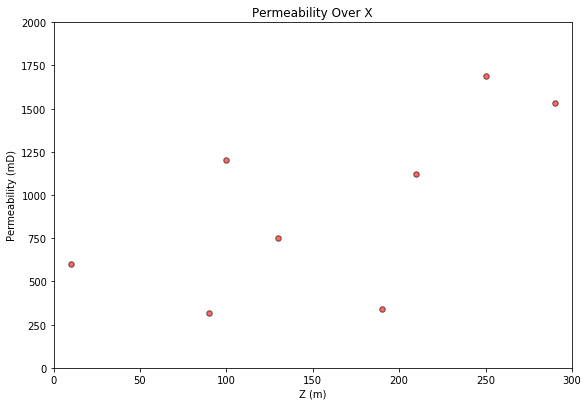

In [11]:
plt.subplot(111)
plt.scatter(df['z'].values,df['perm'].values, s=30, alpha = 0.6, edgecolors = "black", facecolors = 'red')
plt.xlabel('Z (m)')
plt.ylabel('Permeability (mD)')
plt.title('Permeability Over X')
plt.ylim(0.0,2000)
plt.xlim(0,300)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

array([ 401.5820029 ,  693.1681526 ,  729.61642131,  838.96122745,
       1057.65083973, 1130.54737715, 1276.340452  , 1422.13352685])

It seems pretty clear that permeability mean is not stationary over 𝑧, let's fit a variety of polygonal trends including, 1st, 3rd, 5th and 7th order polynomials (in order of increasing complexity).

We will plot the polynomial model fit with the (model training) data and the residual (training data - model) at sampled 𝑧 locations.

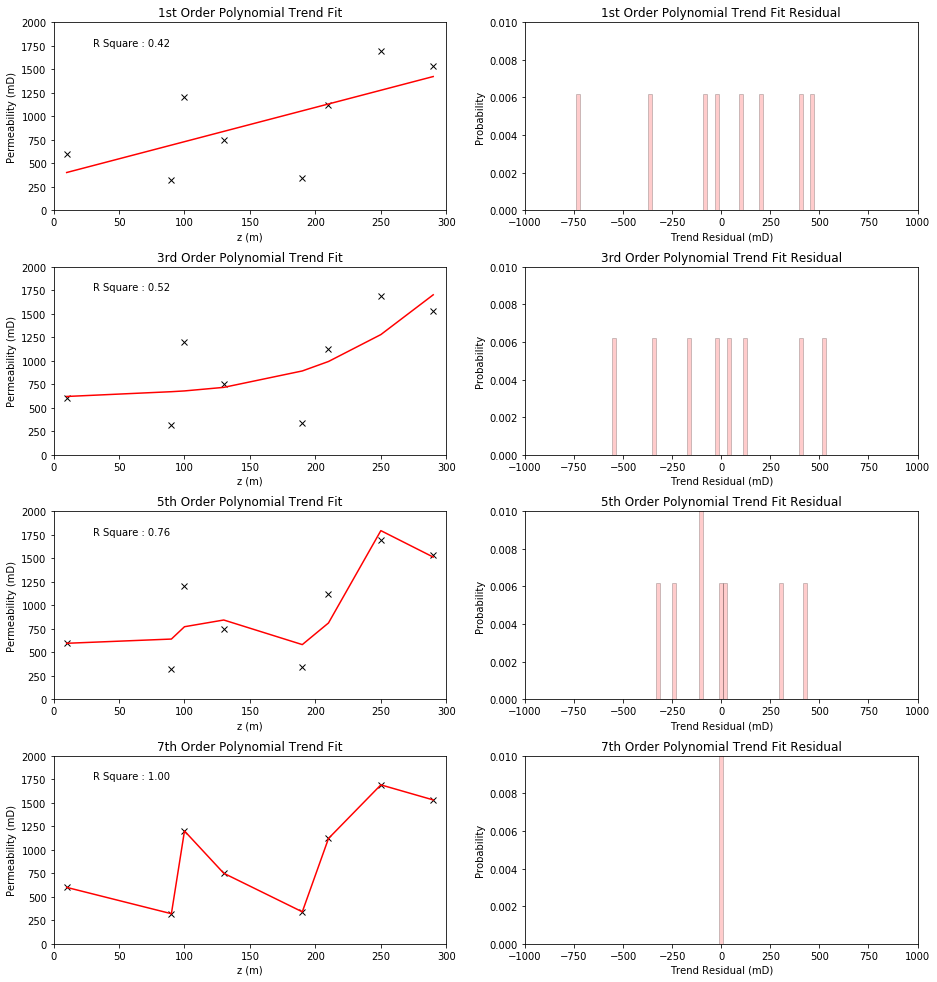

In [12]:

p1 = np.polyfit(df['z'],df['perm'], deg=1, rcond=None, w=None, cov=False)
m1 = np.polyval(p1,df['z'])
coefficient_of_dermination1 = r2_score(df['perm'], m1)

p3 = np.polyfit(df['z'],df['perm'], deg=3, rcond=None, w=None, cov=False)
m3 = np.polyval(p3,df['z'])
coefficient_of_dermination3 = r2_score(df['perm'], m3)

p5 = np.polyfit(df['z'],df['perm'], deg=5, rcond=None, w=None, cov=False)
m5 = np.polyval(p5,df['z'])
coefficient_of_dermination5 = r2_score(df['perm'], m5)

p7 = np.polyfit(df['z'],df['perm'], deg=7, rcond=None, w=None, cov=False)
m7 = np.polyval(p7,df['z'])
coefficient_of_dermination7 = r2_score(df['perm'], m7)

plt.subplot(421)
plt.plot(df['z'],df['perm'], 'x', c='black')
plt.plot(df['z'], m1, c='red')
plt.xlim([0,300]); plt.ylim([0,2000])
plt.xlabel('z (m)'); plt.ylabel('Permeability (mD)'); plt.title('1st Order Polynomial Trend Fit')
plt.text(30, 1750, 'R Square : %.2f' %(coefficient_of_dermination1))

plt.subplot(422)
r1 = df['perm'].values - np.polyval(p1,df['z'].values)
plt.hist(r1, facecolor='red',bins=np.linspace(-1000,1000,100),alpha=0.2,density=True,edgecolor='black')
plt.xlim([-1000,1000]); plt.ylim([0,.01])
plt.xlabel('Trend Residual (mD)'); plt.ylabel('Probability'); plt.title('1st Order Polynomial Trend Fit Residual')


plt.subplot(423)
plt.plot(df['z'],df['perm'], 'x', c='black')
plt.plot(df['z'], m3, c='red')
plt.xlim([0,300]); plt.ylim([0,2000])
plt.xlabel('z (m)'); plt.ylabel('Permeability (mD)'); plt.title('3rd Order Polynomial Trend Fit')
plt.text(30, 1750, 'R Square : %.2f' %(coefficient_of_dermination3))

plt.subplot(424)
r3 = df['perm'].values - np.polyval(p3,df['z'].values)
plt.hist(r3, facecolor='red',bins=np.linspace(-1000,1000,100),alpha=0.2,density=True,edgecolor='black')
plt.xlim([-1000,1000]); plt.ylim([0,.01])
plt.xlabel('Trend Residual (mD)'); plt.ylabel('Probability'); plt.title('3rd Order Polynomial Trend Fit Residual')

plt.subplot(425)
plt.plot(df['z'],df['perm'], 'x', c='black')
plt.plot(df['z'], m5, c='red')
plt.xlim([0,300]); plt.ylim([0,2000])
plt.xlabel('z (m)'); plt.ylabel('Permeability (mD)'); plt.title('5th Order Polynomial Trend Fit')
plt.text(30, 1750, 'R Square : %.2f' %(coefficient_of_dermination5))

plt.subplot(426)
r5 = df['perm'].values - np.polyval(p5,df['z'].values)
plt.hist(r5, facecolor='red',bins=np.linspace(-1000,1000,100),alpha=0.2,density=True,edgecolor='black')
plt.xlim([-1000,1000]); plt.ylim([0,.01])
plt.xlabel('Trend Residual (mD)'); plt.ylabel('Probability'); plt.title('5th Order Polynomial Trend Fit Residual')

plt.subplot(427)
plt.plot(df['z'],df['perm'], 'x', c='black')
plt.plot(df['z'], m7, c='red')
plt.xlim([0,300]); plt.ylim([0,2000])
plt.xlabel('z (m)'); plt.ylabel('Permeability (mD)'); plt.title('7th Order Polynomial Trend Fit')
plt.text(30, 1750, 'R Square : %.2f' %(coefficient_of_dermination7))

plt.subplot(428)
r7 = df['perm'].values - np.polyval(p7,df['z'].values)
plt.hist(r7, facecolor='red',bins=np.linspace(-1000,1000,100),alpha=0.2,density=True,edgecolor='black')
plt.xlim([-1000,1000]); plt.ylim([0,.01])
plt.xlabel('Trend Residual (mD)'); plt.ylabel('Probability'); plt.title('7th Order Polynomial Trend Fit Residual')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.2, wspace=0.2, hspace=0.3)
plt.show()

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

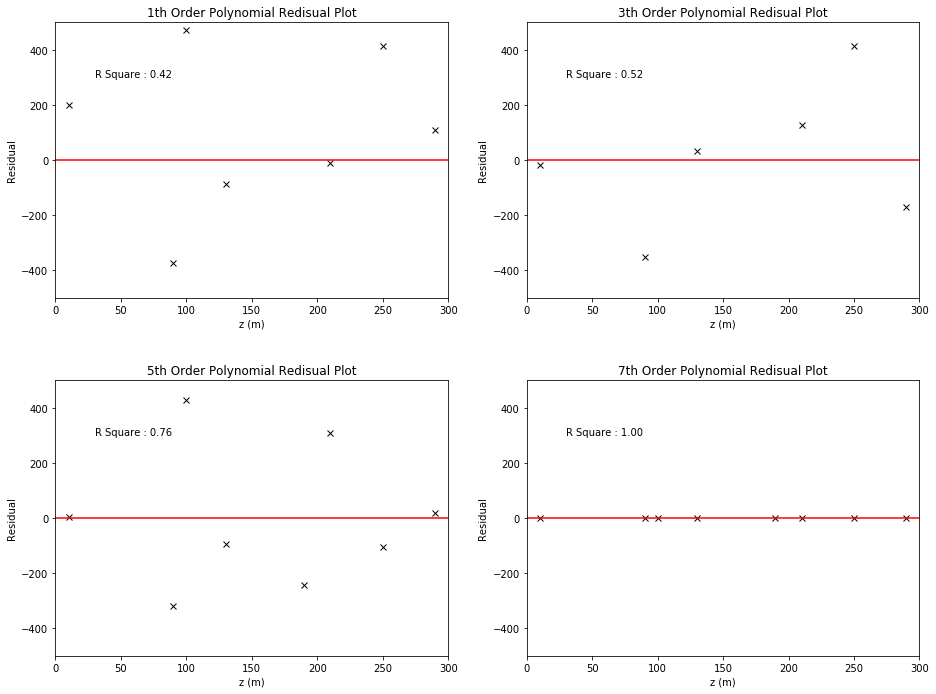

In [13]:
plt.subplot(221)
r1 = df['perm'].values - np.polyval(p1,df['z'].values)
plt.plot(df['z'],r1, 'x', c='black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim([0,300]); plt.ylim([-500,500])
plt.xlabel('z (m)'); plt.ylabel('Residual'); plt.title('1th Order Polynomial Redisual Plot')
plt.text(30, 300, 'R Square : %.2f' %(coefficient_of_dermination1))

plt.subplot(222)
r3 = df['perm'].values - np.polyval(p3,df['z'].values)
plt.plot(df['z'],r3, 'x', c='black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim([0,300]); plt.ylim([-500,500])
plt.xlabel('z (m)'); plt.ylabel('Residual'); plt.title('3th Order Polynomial Redisual Plot')
plt.text(30, 300, 'R Square : %.2f' %(coefficient_of_dermination3))

plt.subplot(223)
r5 = df['perm'].values - np.polyval(p5,df['z'].values)
plt.plot(df['z'],r5, 'x', c='black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim([0,300]); plt.ylim([-500,500])
plt.xlabel('z (m)'); plt.ylabel('Residual'); plt.title('5th Order Polynomial Redisual Plot')
plt.text(30, 300, 'R Square : %.2f' %(coefficient_of_dermination5))

plt.subplot(224)
r7 = df['perm'].values - np.polyval(p7,df['z'].values)
plt.plot(df['z'],r7, 'x', c='black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim([0,300]); plt.ylim([-500,500])
plt.xlabel('z (m)'); plt.ylabel('Residual'); plt.title('7th Order Polynomial Redisual Plot')
plt.text(30, 300, 'R Square : %.2f' %(coefficient_of_dermination7))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

As the complexity of the model, the order of the polynomial, increases the flexibility to fit the data increases. With a 7th order polynomial we infact perfectly fit our 8 data and the residual is contant =

0.

model bias is due to the model's inability to fit the data. e.g. if the model is too simple vs. the complexity observed in the data then the model bias is high. With out 7th order model, model bias is at a minimum as we are able to perfectly fit the data.

Going back to spatial modeling concepts, such as trend modeling, we can recognize that with our 7th order polynomial trend, we have a model that has described all variance in the data, all variance is assigned as known. This is very dangerous, indeed.

What about the ability of this model to make predictions away from the observations used to build it (training data). I withheld some testing data. Let's put them into arrays and then a DataFrame like we did before and then plot them with the training data.

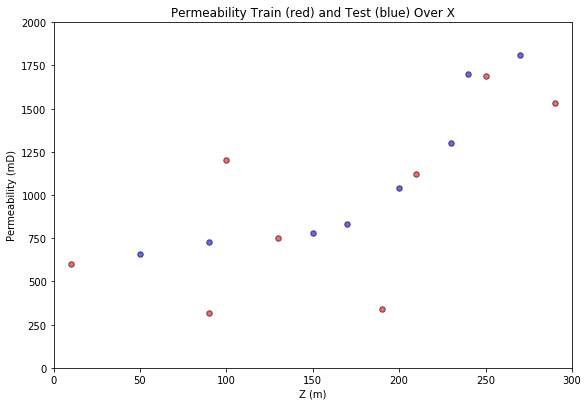

In [14]:
ztest = np.array([50,90,150,170,200,230,240,270])
permtest = np.array([660,730,780,830,1040,1300,1700,1810])
dftest = pd.DataFrame({'z':ztest,'perm':permtest})

plt.subplot(111)
plt.scatter(df['z'].values,df['perm'].values, s=30, alpha = 0.6, edgecolors = "black", facecolors = 'red')
plt.scatter(dftest['z'].values,dftest['perm'].values, s=30, alpha = 0.6, edgecolors = "black", facecolors = 'blue')
plt.xlabel('Z (m)')
plt.ylabel('Permeability (mD)')
plt.title('Permeability Train (red) and Test (blue) Over X')
plt.ylim(0.0,2000)
plt.xlim(0,300)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

The testing data looks fair. They are not unusual compared to the training data, that is they do not have different ranges of values, nor represent significant discontinuities or jumps in the data, also they are not spatially extrapolated. Now let's repeat the plots for our models over a range of complexities, but this time include the testing data for comparison and plot the residual distribution for the testing data (this is testing error).

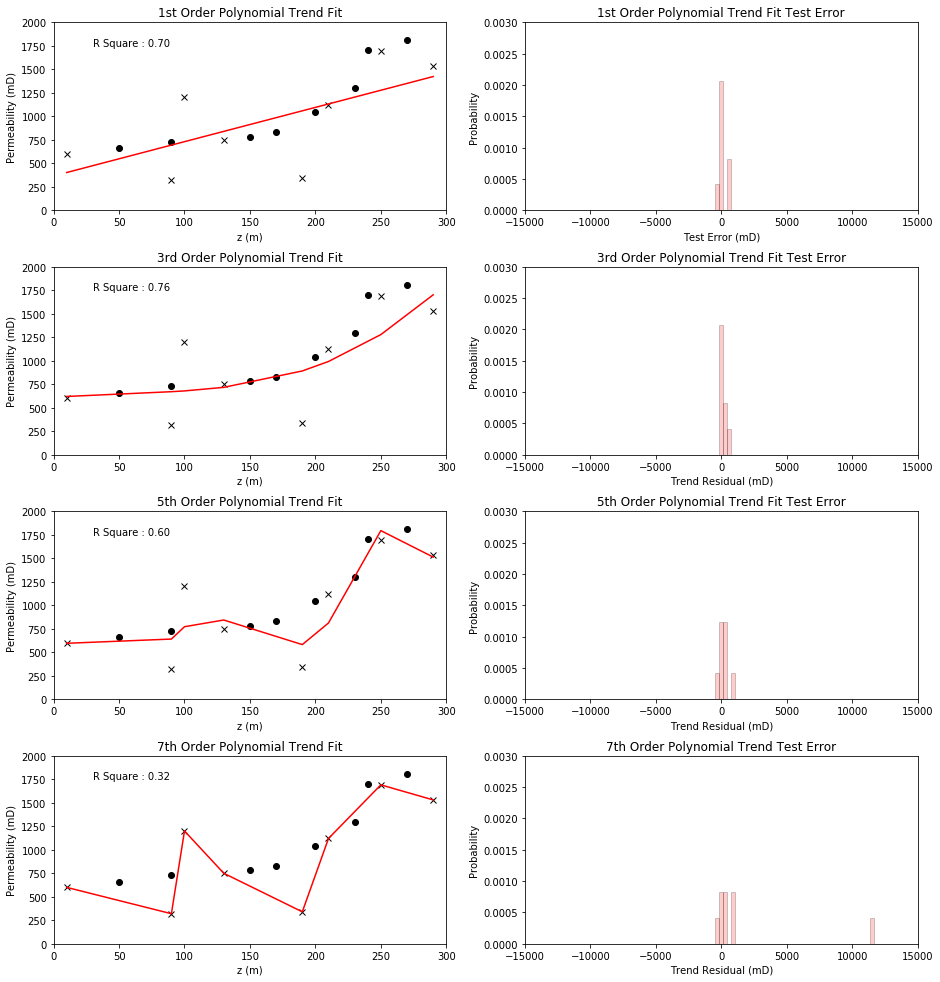

In [15]:
x = np.linspace(0, 300, 8)

p11 = np.polyfit(dftest['z'],dftest['perm'], deg=1, rcond=None, w=None, cov=False)
m11 = np.polyval(p11,df['z'])
coefficient_of_dermination1 = r2_score(dftest['perm'], m1)

p33 = np.polyfit(dftest['z'],dftest['perm'], deg=3, rcond=None, w=None, cov=False)
m33 = np.polyval(p33,df['z'])
coefficient_of_dermination3 = r2_score(dftest['perm'], m3)

p55 = np.polyfit(dftest['z'],dftest['perm'], deg=5, rcond=None, w=None, cov=False)
m55 = np.polyval(p55,df['z'])
coefficient_of_dermination5 = r2_score(dftest['perm'], m5)

p77 = np.polyfit(dftest['z'],dftest['perm'], deg=7, rcond=None, w=None, cov=False)
m77 = np.polyval(p77,df['z'])
coefficient_of_dermination7 = r2_score(dftest['perm'], m7)


plt.subplot(421)
plt.plot(df['z'],df['perm'], 'x', c='black')
plt.plot(dftest['z'],dftest['perm'], 'o', c='black')
plt.plot(df['z'], m1, c='red')
plt.xlim([0,300]); plt.ylim([0,2000])
plt.xlabel('z (m)'); plt.ylabel('Permeability (mD)'); plt.title('1st Order Polynomial Trend Fit')
plt.text(30, 1750, 'R Square : %.2f' %(coefficient_of_dermination1))

plt.subplot(422)
r1test = dftest['perm'].values - np.polyval(p1,dftest['z'].values)
plt.hist(r1test, facecolor='red',bins=np.linspace(-15000,15000,100),alpha=0.2,density=True,edgecolor='black')
plt.xlim([-15000,15000]); plt.ylim([0,.003])
plt.xlabel('Test Error (mD)'); plt.ylabel('Probability'); plt.title('1st Order Polynomial Trend Fit Test Error')

plt.subplot(423)
plt.plot(df['z'],df['perm'], 'x', c='black')
plt.plot(dftest['z'],dftest['perm'], 'o', c='black')
plt.plot(df['z'], m3, c='red')
plt.xlim([0,300]); plt.ylim([0,2000])
plt.xlabel('z (m)'); plt.ylabel('Permeability (mD)'); plt.title('3rd Order Polynomial Trend Fit')
plt.text(30, 1750, 'R Square : %.2f' %(coefficient_of_dermination3))

plt.subplot(424)
r3test = dftest['perm'].values - np.polyval(p3,dftest['z'].values)
plt.hist(r3test, facecolor='red',bins=np.linspace(-15000,15000,100),alpha=0.2,density=True,edgecolor='black')
plt.xlim([-15000,15000]); plt.ylim([0,.003])
plt.xlabel('Trend Residual (mD)'); plt.ylabel('Probability'); plt.title('3rd Order Polynomial Trend Fit Test Error')

plt.subplot(425)
plt.plot(df['z'],df['perm'], 'x', c='black')
plt.plot(dftest['z'],dftest['perm'], 'o', c='black')
plt.plot(df['z'], m5, c='red')
plt.xlim([0,300]); plt.ylim([0,2000])
plt.xlabel('z (m)'); plt.ylabel('Permeability (mD)'); plt.title('5th Order Polynomial Trend Fit')
plt.text(30, 1750, 'R Square : %.2f' %(coefficient_of_dermination5))

plt.subplot(426)
r5test = dftest['perm'].values - np.polyval(p5,dftest['z'].values)
plt.hist(r5test, facecolor='red',bins=np.linspace(-15000,15000,100),alpha=0.2,density=True,edgecolor='black')
plt.xlim([-15000,15000]); plt.ylim([0,.003])
plt.xlabel('Trend Residual (mD)'); plt.ylabel('Probability'); plt.title('5th Order Polynomial Trend Fit Test Error')

plt.subplot(427)
plt.plot(df['z'],df['perm'], 'x', c='black')
plt.plot(dftest['z'],dftest['perm'], 'o', c='black')
plt.plot(df['z'], m7, c='red')
plt.xlim([0,300]); plt.ylim([0,2000])
plt.xlabel('z (m)'); plt.ylabel('Permeability (mD)'); plt.title('7th Order Polynomial Trend Fit')
plt.text(30, 1750, 'R Square : %.2f' %(coefficient_of_dermination7))

plt.subplot(428)
r7test = dftest['perm'].values - np.polyval(p7,dftest['z'].values)
plt.hist(r7test, facecolor='red',bins=np.linspace(-15000,15000,100),alpha=0.2,density=True,edgecolor='black')
plt.xlim([-15000,15000]); plt.ylim([0,.003])
plt.xlabel('Trend Residual (mD)'); plt.ylabel('Probability'); plt.title('7th Order Polynomial Trend Test Error')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.2, wspace=0.2, hspace=0.3)
plt.show()

See what happenned? As the complexity increased, our model becomes more inaccurate for the testing data.

model variance is the sensitivity of the model to the exact data provided for training. Our 1st order model was not very sensitive to the training data, swapping training data with testing data would not have changed the model very much. Yet, with the 7th order model, making this swap would have dramatically changed the model.

Getting back to spatial modeling, with our complicated trend model, we have fit all the idiosyncracies in the data resulting in a very poor prediction model away from the data. This complicated model would not be a defendable trend model!

Can statistics help us further communicate that the complicated model is not a good model? You bet, we can plot the confidence interval in the trend models. This is an envelope of 95% uncertainty in the entire trend model given a limited number of noisy data (not to be confused with prediction interval for the next observation).
